# Champignons mortels ?
Ou simplement commestibles...

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing as pp
from sklearn.metrics import roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Données

Dans une première approche regardons de façon efficace nos données qui sont ici pour l'ensemble des variable des labels.

In [3]:
df = pd.read_csv('mushrooms.csv');
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Taille de la dataframe
print(df.shape)

(8124, 23)


In [5]:
# Description des valeurs possiblepar colonne
for col in df.columns:
    print(col, " : ", df[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Ces informations décrivent les différentes caractéristiques des champignons dans le jeu de données "meshroom.csv", y compris leur forme, leur couleur, leur odeur, etc. La classe des champignons est indiquée comme étant comestible (e) ou vénéneuse (p).
Pour mieux comprendre voici en français et le même ordre la signification de chaque champ

* classes : comestible=e, vénéneux=p

* forme du chapeau : cloche=b, conique=c, convexe=x, plat=f, bosselé=k, enfoncé=s

* surface du chapeau : fibreuse=f, rainures=g, écailleuse=y, lisse=s

* couleur du chapeau : brun=n, beige=b, cannelle=c, gris=g, vert=r, rose=p, violet=u, rouge=e, blanc=w, jaune=y

* meurtrissures : meurtrissures=t, non=f

* odeur : amande=a, anis=l, créosote=c, poisson=y, fétide=f, moisi=m, aucune=n, piquante=p, épicée=s

* attachement des lames : attachées=a, descendantes=d, libres=f, encochées=n

* espacement des lames : rapproché=c, serré=w, distant=d

* taille des lames : large=b, étroit=n

* couleur des lames : noir=k, brun=n, beige=b, chocolat=h, gris=g, vert=r, orange=o, rose=p, violet=u, rouge=e, blanc=w, jaune=y

* forme de la tige : élargissement=e, effilée=t

* racine de la tige : bulbeuse=b, club=c, en forme de coupe=u, égale=e, rhizomorphes=z, enracinée=r, manquante=?

* surface de la tige au-dessus de l'anneau : fibreuse=f, écailleuse=y, soyeuse=k, lisse=s

* surface de la tige en dessous de l'anneau : fibreuse=f, écailleuse=y, soyeuse=k, lisse=s

* couleur de la tige au-dessus de l'anneau : brun=n, beige=b, cannelle=c, gris=g, orange=o, rose=p, rouge=e, blanc=w, jaune=y

* couleur de la tige en dessous de l'anneau : brun=n, beige=b, cannelle=c, gris=g, orange=o, rose=p, rouge=e, blanc=w, jaune=y

* type de voile : partiel=p, universel=u

* couleur du voile : brun=n, orange=o, blanc=w, jaune=y

* nombre d'anneaux : aucun=n, un=o, deux=t

* type d'anneau : en toile d'araignée=c, évanescents=e, évasés=f, grands=l, aucun=n, pendants=p, gainants=s, zone=z

* couleur de la spore : noir=k, brun=n, beige=b, chocolat=h, vert=r, orange=o, violet=u, blanc=w, jaune=y

* population : abondante=a, regroupée=c, nombreuse=n, dispersée=s, plusieurs=v, solitaire=y

* habitat : herbes=g, feuilles=l, prairies=m, sentiers=p, urbain=u, déchets=w, bois=d

In [6]:
#une description sommaire des labels les plus fréquents
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# valeur manquante
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Les données sont "propres" pas de données manquantes.

Regardons suivant chaque variable la répartition du couple (e,p) e=edible, p=poisonous, suivant chaque label on trace l'effectif des 2 classes (e,p).

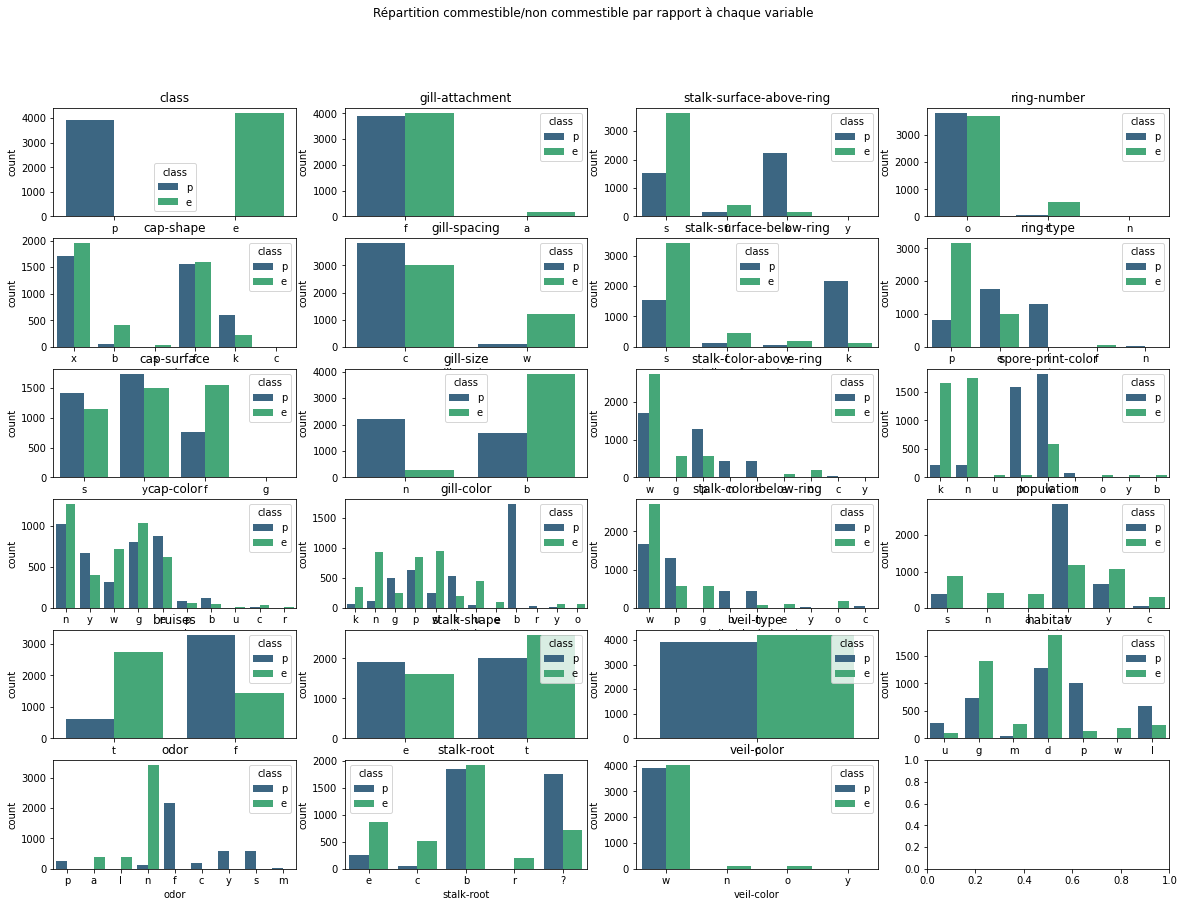

In [9]:
names=df.columns
fig, axes = plt.subplots(6, 4, figsize=(20,14))
fig.suptitle('Répartition commestible/non commestible par rapport à chaque variable')

for i in range(0,6,1):
    for j in range(0,4,1):
        if ((i + j*6)<23):
            sns.countplot(ax=axes[i, j], data=df, x=names[i+j*6], hue='class', palette='viridis').set(title=names[i+j*6])
        

Plus particulièrement regardons "odor" qui est assez particulière

[Text(0.5, 1.0, 'Class by Odor')]

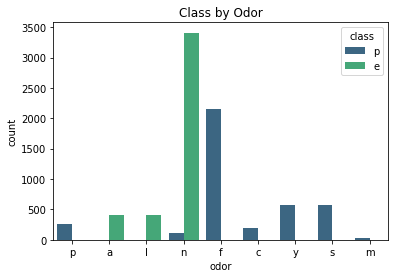

In [10]:
sns.countplot(data=df, x='odor', hue='class', palette='viridis').set(title='Class by Odor')

La lecture de se graphe suggère de faire une petite manipulation en regroupant les lavels (a,l,n) et (p,f,c,y,s,m) que l'on va mettre dans une nouvelle colone

[Text(0.5, 1.0, 'Class by NewOdor')]

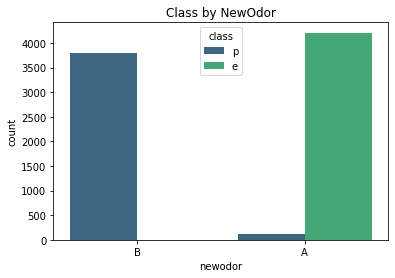

In [11]:
df=df.assign(newodor=df['odor']);
df['newodor'].replace(['a','l','n'],'A',inplace=True)
df['newodor'].replace(['p','f','c','y','s','m'],'B',inplace=True)
df['newodor'].unique()
sns.countplot(data=df, x='newodor', hue='class', palette='viridis').set(title='Class by NewOdor')

## Encodage et corrélation

Regardons maintenant un peu plus d'information (graphiques) sur nos données et pour cela nous allons encoder nos labels 


In [12]:
from sklearn.preprocessing import LabelEncoder
# On encode la target par LabelEncoder, car l'on ne souhaite qu'un scalaire en sortie et non un vecteur, pour les besoins des graphes
la = LabelEncoder()
for i in df.columns:
    df[i] = la.fit_transform(df[i])


In [13]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,newodor
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,5,5,0,1,1,4,0,1,2,0
8120,0,5,2,4,0,5,0,0,0,11,...,5,5,0,0,1,4,0,4,2,0
8121,0,2,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,1,2,0
8122,1,3,3,4,0,8,1,0,1,0,...,7,7,0,2,1,0,7,4,2,1


In [14]:
cor = df.corr()
rela = cor['class'].sort_values(ascending = False)
rela

class                       1.000000
newodor                     0.970814
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

In [15]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,newodor
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179,0.970814
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.087752
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.168949
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.042619
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.517370
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.105729
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.124571
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.346645
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.535020
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.558314


<Axes: >

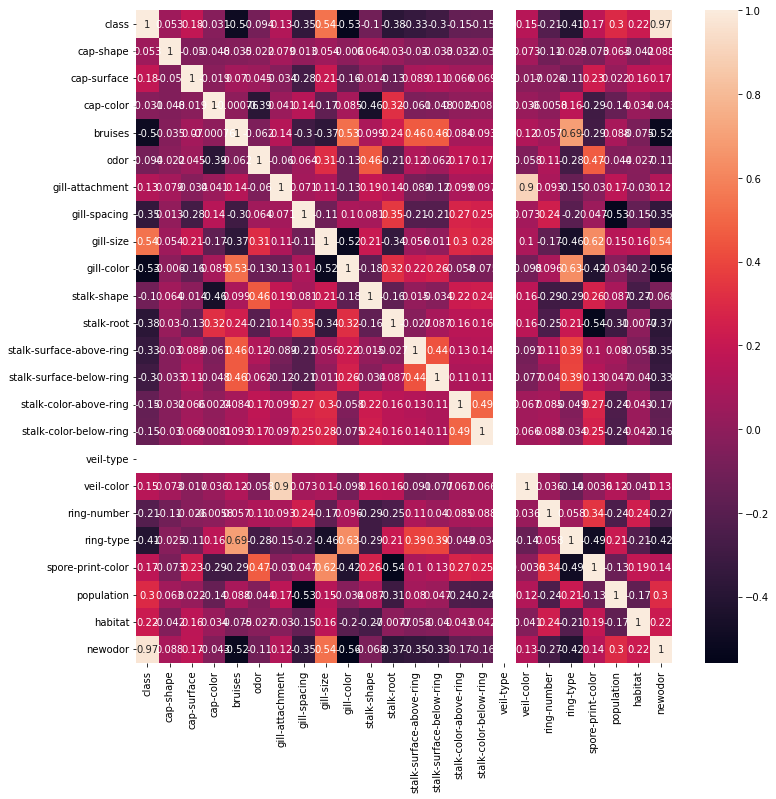

In [16]:
plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot = True)

La variable "veil-type" se démarque, c'est une colonne de 0 :

In [17]:
df['veil-type'].unique()

array([0])

On supprime cette varaible

In [18]:
df.drop('veil-type', inplace = True, axis=1)

## Modèle

Le choix est fait ici de se restreindre aux variables qui sont corrélées le plus avec le résultats
(Il est tout à fait possible de construire un modèle qui prend en compte l'ensemble des caractéristiques! )

In [24]:
carac= []
for i in range(len(rela)):
    if rela[i]>0:
        carac.append(rela.index[i])
carac

['class',
 'newodor',
 'gill-size',
 'population',
 'habitat',
 'cap-surface',
 'spore-print-color',
 'veil-color',
 'gill-attachment',
 'cap-shape']

séparation des caractéristiques et de la cible

In [25]:
x = df.copy()[carac]
x.drop('class', inplace = True, axis = 1)

y= df['class']

In [26]:
x

,newodor,gill-size,population,habitat,cap-surface,spore-print-color,veil-color,gill-attachment,cap-shape
0,1,1,3,5,2,2,2,1,5
1,0,0,2,1,2,3,2,1,5
2,0,0,2,3,2,3,2,1,0
3,1,1,3,5,3,2,2,1,5
4,0,0,0,1,2,3,2,1,5
...,...,...,...,...,...,...,...,...,...
8119,0,0,1,2,2,0,1,0,3
8120,0,0,4,2,2,0,0,0,5
8121,0,0,1,2,2,0,1,0,2
8122,1,1,4,2,3,7,2,1,3


In [28]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
# Créer un modèle séquentiel Keras
model = keras.Sequential()

# Ajouter une couche d'entrée avec 9 entrées (correspondant aux caractéristiques)
model.add(layers.Input(shape=(9,)))

# Ajouter une couche cachée avec 8 neurones et une fonction d'activation ReLU
model.add(layers.Dense(8, activation='relu'))

# Ajouter une couche de sortie avec 3 neurones (correspondant aux classes Iris)
# Utiliser une fonction d'activation softmax pour la classification multiclasses
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compiler le modèle en spécifiant la fonction de perte, l'optimiseur
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [46]:
model.fit(x, y, epochs=300, batch_size=151, verbose=2)

Epoch 1/300
54/54 - 0s - loss: 0.0091 - accuracy: 0.9962 - 290ms/epoch - 5ms/step
Epoch 2/300
54/54 - 0s - loss: 0.0090 - accuracy: 0.9958 - 285ms/epoch - 5ms/step
Epoch 3/300
54/54 - 0s - loss: 0.0091 - accuracy: 0.9961 - 282ms/epoch - 5ms/step
Epoch 4/300
54/54 - 0s - loss: 0.0090 - accuracy: 0.9964 - 283ms/epoch - 5ms/step
Epoch 5/300
54/54 - 0s - loss: 0.0089 - accuracy: 0.9962 - 280ms/epoch - 5ms/step
Epoch 6/300
54/54 - 0s - loss: 0.0089 - accuracy: 0.9966 - 281ms/epoch - 5ms/step
Epoch 7/300
54/54 - 0s - loss: 0.0089 - accuracy: 0.9961 - 283ms/epoch - 5ms/step
Epoch 8/300
54/54 - 0s - loss: 0.0088 - accuracy: 0.9962 - 283ms/epoch - 5ms/step
Epoch 9/300
54/54 - 0s - loss: 0.0087 - accuracy: 0.9961 - 286ms/epoch - 5ms/step
Epoch 10/300
54/54 - 0s - loss: 0.0086 - accuracy: 0.9962 - 285ms/epoch - 5ms/step
Epoch 11/300
54/54 - 0s - loss: 0.0088 - accuracy: 0.9959 - 285ms/epoch - 5ms/step
Epoch 12/300
54/54 - 0s - loss: 0.0087 - accuracy: 0.9962 - 284ms/epoch - 5ms/step
Epoch 13/300


In [47]:
scores = model.evaluate(x, y);
accuracy = scores[1]
accuracy

254/254 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 1.0000


1.0

C'est donc parfait 100% de précision avec seulement 1 couche cachée de 8 neuronnes et 9 champs d'entrée.